In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [69]:
df.duplicated()
df.drop_duplicates()
df.shape

(6704, 9)

In [70]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [71]:
np.where(df.isnull())

(array([ 172,  172,  172,  172,  172,  172,  260,  260,  260,  260,  260,
         260, 2011, 3136, 5247, 5247, 6455], dtype=int64),
 array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 3, 6, 5, 6, 6], dtype=int64))

In [72]:
df.iloc[172]

Unnamed: 0               172
Age                      NaN
Gender                   NaN
Education Level          NaN
Job Title                NaN
Years of Experience      NaN
Salary                   NaN
Country                   UK
Race                   White
Name: 172, dtype: object

In [73]:
#we will fill null value in education level
df['Education Level'].fillna(method='ffill', inplace=True)
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        0
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [74]:
#drop row that have null value
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [75]:
df.shape

(6699, 9)

In [76]:
df.nunique()

Unnamed: 0             6699
Age                      41
Gender                    3
Education Level           7
Job Title               192
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

In [79]:
#we will perform our task on these numeric column
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6699.000000,6699.000000,6699.000000,6699.000000
mean,3351.722048,33.622033,8.095014,115326.964771
std,1934.874328,7.615646,6.059853,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1676.500000,28.000000,3.000000,70000.000000
50%,3352.000000,32.000000,7.000000,115000.000000
75%,5026.500000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


Visualization

c:\Users\prade\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


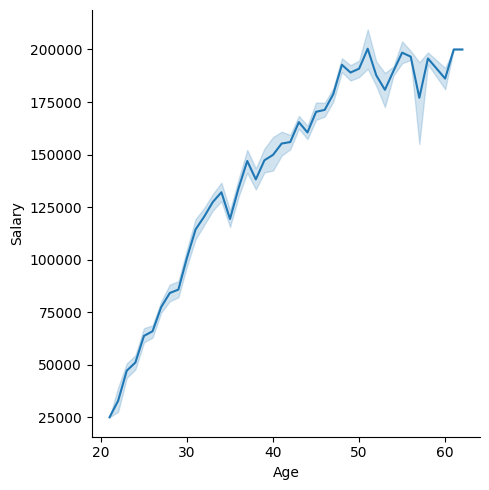

In [213]:
sns.relplot(x='Age', y='Salary', data=df, kind='line')
plt.show()

Text(0.5, 1.0, 'Salary of employee Gender and Experience wise')

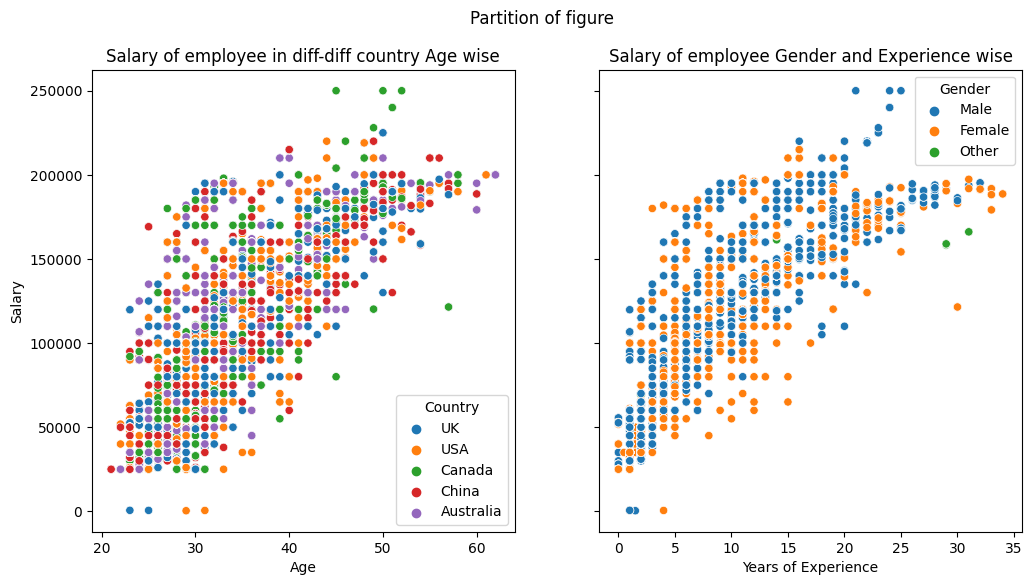

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Partition of figure')

sns.scatterplot(ax=axes[0], x='Age', y='Salary', data=df, hue="Country")
axes[0].set_title('Salary of employee in diff-diff country Age wise')
sns.scatterplot(ax=axes[1], x='Years of Experience', y='Salary', data=df, hue="Gender")
axes[1].set_title('Salary of employee Gender and Experience wise')


<Axes: xlabel='Country', ylabel='Years of Experience'>

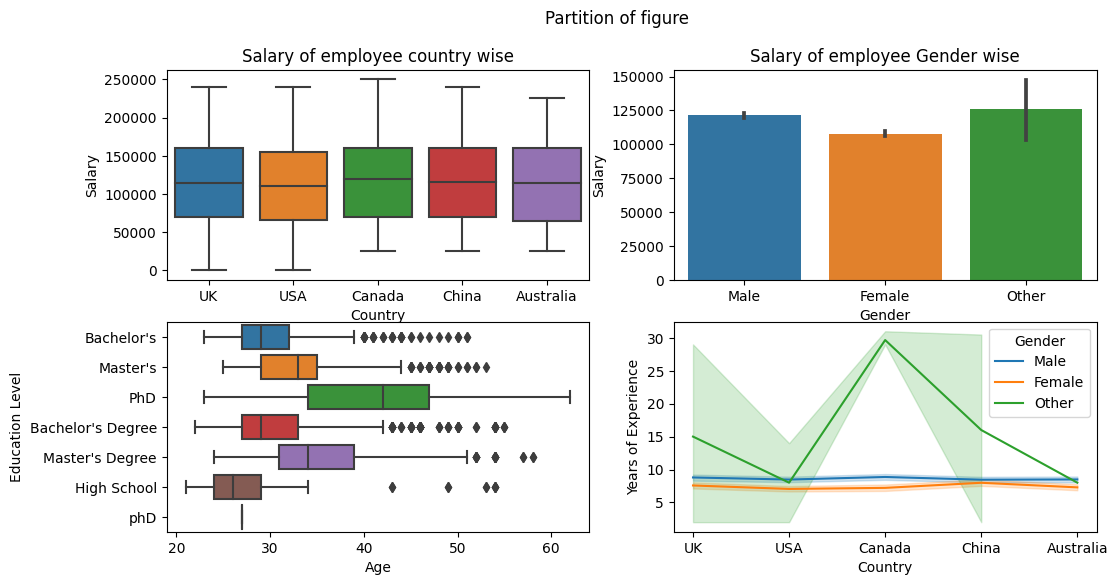

In [200]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Partition of figure')

sns.boxplot(ax=axes[0, 0], x='Country', y='Salary', data=df)
axes[0,0].set_title('Salary of employee country wise')

sns.barplot(ax=axes[0, 1], x='Gender', y='Salary', data=df)
axes[0,1].set_title('Salary of employee Gender wise')

sns.boxplot(ax=axes[1, 0], x='Age', y='Education Level', data=df)
# axes[1,0].set_title('Education level')

sns.lineplot(ax=axes[1, 1], x='Country', y='Years of Experience', data=df, hue='Gender')
# axes[1,1].set_title('Year of experience')


c:\Users\prade\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


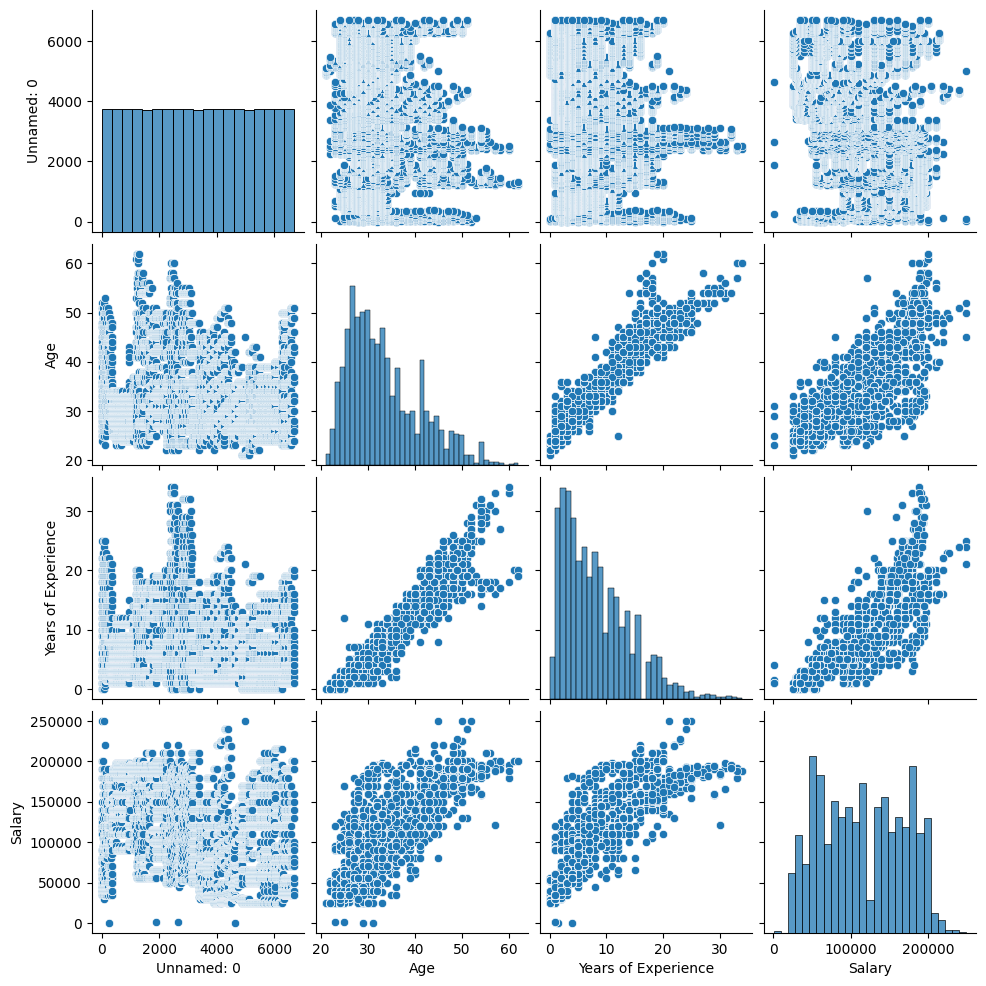

In [201]:
sns.pairplot(data=df)
plt.show()